## 컴퓨터 비전

    

### 컴퓨터 비전
- 컴퓨터를 이용하여 정지 영상 또는 동영상으로부터 의미 있는 정보를 추출하는 방법을 연구하는 학문
- 즉, 사람이 눈으로 사물을 보고 인지하는 작업을 컴퓨터가 수행하게끔 만드는 학문
- 영상의 화질 개선
- 객체 검출과 분할
- 인식

### 머신 비전
- 공장 자동화: 제품의 불량 검사, 위치 확인, 측정 등
- 높은 정확도와 빠른 처리 시간 요구
- 조명, 렌즈, 필터, 실시간 (Real-time) 처리

### 영상이란
- 픽셀(pixel)이 바둑판 모양의 격자에 나열되어 있는 형태 (2차원 행렬)
- 픽셀: 영상의 기본 단위, picture element, 화소

#### 그레이스케일과 트루컬러
- 그레이스케일(grayscale) 영상
    - 흑백 사진처럼 색상 정보가 없이 오직 밝기 정보만으로 구성된 영상
    - 밝기 정보를 256단계로 표현

- 트루컬러(truecolor) 영상
    - 컬러 사진처럼 색상 정보를 가지고 있어서 다양한 색상을 표현할 수 있는 영상
    - Red, Green, Blue 색 성분을 256단계로 표현
    - $256^3 = 16,777,216$ 색상 표현 가능

#### 컬러 영상의 표현방법
- 컬러 영상의 픽셀 값 표현
    - R, G, B 색 성분의 크기를 각각 0~255 범위의 정수로 표현
        - 0: 해당 색 성분이 전혀 없는 상태
        - 255: 해당 색 성분이 가득 있는 상태
    
    - 프로그래밍 언어에서 표현 방법: 3Bytes 사용
        - C/C++ -> 구조체, 클래스
        - Python -> 튜플, numpy.ndarray

#### 영상 데이터의 크기
- 영상 데이터 크기 분석
    - 그레이스케일 영상: 가로크기 * 세로크기 Bytes
    - 트루컬러 영상: 가로크기 * 세로크기 * 3 Bytes

### 이미지 읽기

In [2]:
# import
import matplotlib.pyplot as plt
import cv2

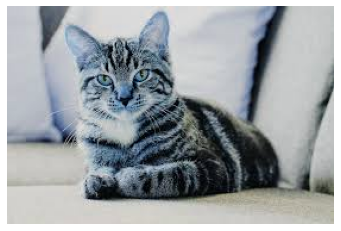

In [19]:
imgBGR = cv2.imread('cat.jpg')
plt.axis('off')
plt.imshow(imgBGR)
plt.show()

#### OpenCV는 BGR이라 RGB로 바꾸어야 어색하지 않다

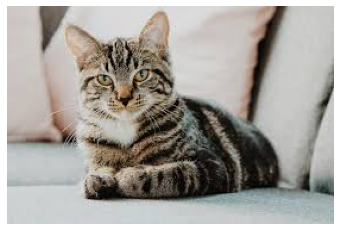

In [20]:
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

#### 읽을 때 바로 변경할 수도 있다

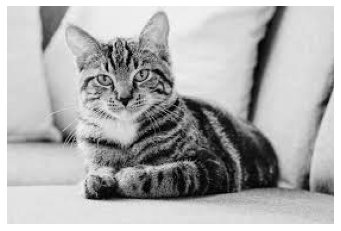

In [22]:
imgGray = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

#### numpy.ndarray로 표현한다

![ndarray](ndarray.png)

In [28]:
imgGray.shape, imgRGB.shape

((183, 275), (183, 275, 3))

In [29]:
imgGray.ndim, imgRGB.ndim

(2, 3)

In [30]:
imgGray.size, imgRGB.size

(50325, 150975)

In [31]:
imgGray.dtype, imgRGB.dtype

(dtype('uint8'), dtype('uint8'))

#### 영상의 속성과 픽셀값

![dtype](dtype.png)

### 마스크 연산

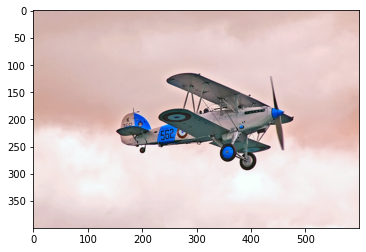

In [33]:
src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)
plt.imshow(src);

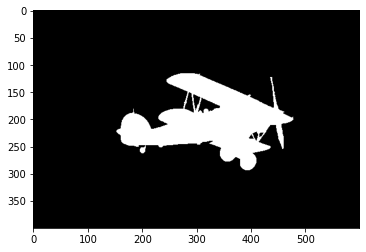

In [37]:
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray');

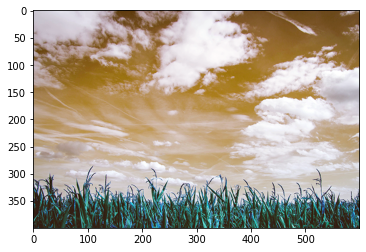

In [38]:
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)
plt.imshow(dst);

#### 마스크 연산과 ROI
- ROI
    - Region of Interest, 관심 영역
    - 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역

- 마스크 연산
    - OpenCV는 일부 함수에 대해 ROI 연산을 지원하며, 이때 마스크 영상을 인자로 함께 전달해야 함
        - (e.g.) cv2.copyTo(), cv2.calcHist(), cv2.bitwise_or(), cv2.matchTemplate(), etc.
    - 마스크 영상은 cv2.CV_8UC1 타입(그레이스케일 영상)
    - 마스크 영상의 픽셀 값이 0이 아닌 위치에서만 연산이 수행됨
        - 보통 마스크 영상으로는 0 또는 255로 구성된 이진 영상(binary image)을 사용 

#### 마스크 연산을 지원하는 픽셀값 복사함수
- cv2.copyTo(src, mask, dst=None) -> dst
    - src: 입력 영상
    - mask: 마스크 영상
        - cv2.CV_8U. (numpy.uint8) 
        - 0이 아닌 픽셀에 대해서만 복사 연산을 수행
    - dst: 출력 영상
        - 만약 src와 크기 및 타입이 같은 dst를 입력으로 지정하면 dst를 새로 생성하지 않고 연산을 수행
        - 그렇지않으면 dst를 새로 생성하여 연산을 수행한 후 반환함

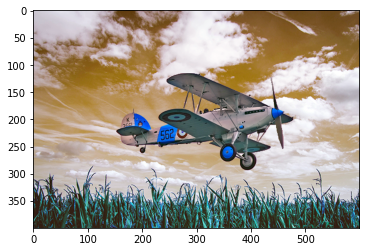

In [39]:
plt.imshow(cv2.copyTo(src, mask, dst));

### 이미지 그리기

#### 직선 그리기

![line](line.png)

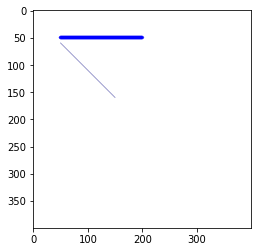

In [45]:
import numpy as np

img = np.full((400, 400, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 5)
cv2.line(img, (50, 60), (150, 160), (0, 0, 128))

plt.imshow(img);

#### 사각형 그리기

![rectangle](rectangle.png)

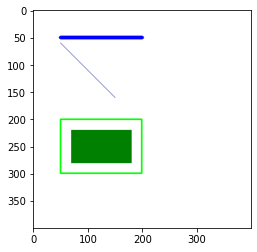

In [46]:
cv2.rectangle(img, (50, 200, 150, 100), (0, 255, 0), 2)
cv2.rectangle(img, (70, 220), (180, 280), (0, 128, 0), -1)

plt.imshow(img);

#### 원 그리기

![circle](circle.png)

#### 다각형 그리기

![polylines](polylines.png)

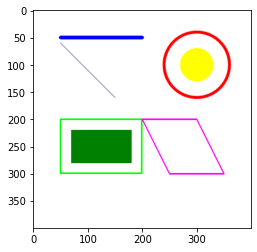

In [47]:
cv2.circle(img, (300, 100), 30, (255, 255, 0), -1, cv2.LINE_AA)
cv2.circle(img, (300, 100), 60, (255, 0, 0), 3, cv2.LINE_AA)

pts = np.array([[200, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2)

plt.imshow(img);

#### 문자열 그리기

![puttexts](puttexts.png)

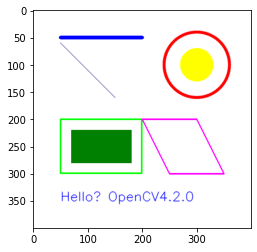

In [48]:
text = 'Hello? OpenCV' + cv2.__version__
cv2.putText(img, text, (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
           (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(img);

### 비디오 읽기

![videocapture1](videocapture1.png)
![videocapture2](videocapture2.png)
![videocapture3](videocapture3.png)
![videocapture4](videocapture4.png)
![videocapture5](videocapture5.png)
![videocapture6](videocapture6.png)
![videocapture7](videocapture7.png)
![videocapture8](videocapture8.png)

### 비디오 저장

![videowriter1](videowriter1.png)
![videowriter2](videowriter2.png)
![videowriter3](videowriter3.png)
![videowriter4](videowriter4.png)
![videowriter5](videowriter5.png)